In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fct_invoice.csv')
age = pd.read_json('dim_customer.json')
age.to_csv('dim_customer.csv', index=False)
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [27]:
# EASY 
# 1. How many unique customers are in the dataset? 
# 5191

unique_customers = df['customer_id'].nunique()
unique_customers

5191


In [28]:
# 2. What are the different categories of products available? How many unique categories are there?
# Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
# 8

categories = df['category'].unique()
print(categories)
categories_count = df['category'].nunique()
print(categories_count)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [30]:
# 3. Which payment method is the most popular? How many times was it used?
# Cash
# 44447

payment_count = df['payment_method'].value_counts()
payment_count


payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [33]:
# MEDIUM
# 1. What are the three most popular categories, by total sales?
# Clothing, Shoes, Technology

df['total_sales'] = df['price'] * df['quantity']
popular_category = df.groupby(['category']).sum('total_sales').sort_values('price', ascending=False)
popular_category


,customer_id,quantity,price,total_sales
category,,,,
Clothing,34578159,103558,31075684.64,1.139968e+08
Shoes,9901187,30217,18135336.89,6.655345e+07
Technology,5069499,15021,15772050.00,5.786235e+07
Cosmetics,15306996,45465,1848606.90,6.792863e+06
Toys,9967553,30321,1086704.64,3.980426e+06
Food & Beverage,14752133,44277,231568.71,8.495351e+05
Books,4934549,14982,226977.30,8.345529e+05
Souvenir,4911521,14871,174436.83,6.358247e+05


In [32]:
# 2. What are the total sales attributed to customers over the age of 45?
# 82039768.15

sales = pd.merge(df, age, left_on='customer_id', right_on='id')
sales_45 = sales[sales['age'] > 45]
sales_45['total_sales'].sum()

np.float64(82039768.15)

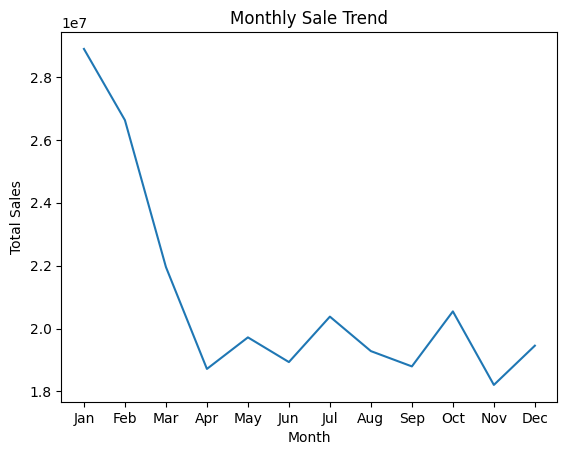

In [31]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
monthly = df.groupby(df['invoice_date'].dt.month).sum(numeric_only=True)

y = monthly['total_sales']
x = monthly.index

plt.plot(x,y)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sale Trend')
plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.show()

In [24]:
# HARD 
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
sales['Age Bracket'] = sales['age'].apply(lambda x: '0-9' if x <= 9 else ('10-19' if x <= 19 else ('20-29' if x <=29 else ('30-39' if x <=39 else ('40-49' if x <=49 else ('50-59' if x <=59 else ('60-69' if x <=69 else ('70-79' if x <= 79 else('80-89')))))))))
pivot = pd.pivot_table(sales, values='total_sales', index='Age Bracket', columns='category')

pivot


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
Age Bracket,,,,,,,,
10-19,170.690000,3423.470409,466.465362,60.365822,6492.034967,137.501667,13291.764706,364.013494
20-29,167.287895,3235.711111,447.169978,54.763010,6568.601153,121.287682,11488.100437,416.775758
30-39,165.962722,3350.288274,442.264487,57.932842,7045.831370,128.700241,11665.340909,390.875836
40-49,170.987059,3291.808019,447.232656,57.149515,6801.152004,134.124848,11363.645038,390.906880
50-59,162.255844,3345.819047,442.273108,55.668747,6688.980389,128.974930,11430.927835,396.629333
60-69,172.696996,3280.197563,451.069230,56.626636,6763.454231,123.652652,10921.257485,386.364331
70-79,156.204701,3307.522895,444.886008,57.887466,6627.616938,127.216480,11774.271845,403.610281
80-89,168.934918,3305.673108,454.420597,58.445696,6481.809260,126.476879,11716.817975,392.857184
